# Linear Regression

This notebook provides a complete implementation of Linear Regression following the methodology from Chapter 4.

## Dataset Overview
- **Dataset**: House Prices Dataset (houses_data_eng.csv)
- **Dataset Path**: `Linear-Regression/houses_data_eng.csv`
- **Target Variable**: `new_price` (house price)
- **Features**: 
  - Numeric: `chambres` (bedrooms), `salles de bains` (bathrooms), `surface` (area in m²), `floor`
  - Binary: `ascenseur` (elevator), `terrasse` (terrace), `parking`
  - Categorical: `Type`, `City`, `Nighberd` (neighborhood)
- **Total Samples**: 4675

## Notebook Structure
This notebook contains comprehensive steps covering:
1. Understanding the Linear Regression Model (theory)
2. Generate Sample Data (simple example)
3. Mathematical Solution - Normal Equation
4. Alternative Computational Methods (SVD, Pseudoinverse)
5. Make Predictions
6. Using Scikit-Learn Implementation
7. Evaluate Model Performance
8. Understanding Computational Complexity
9. Handling Edge Cases
10. Practical Implementation with Houses Dataset


## Step 1: Understanding the Linear Regression Model

### Model Formulation

Linear regression predicts a target value ŷ using:

- **Linear equation**: ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
- **Vectorized form**: ŷ = hθ(x) = θ·x
- **Matrix form**: ŷ = Xθ (for multiple instances)

Where:
- θ₀ is the bias/intercept term
- θ₁ to θₙ are feature weights
- x₁ to xₙ are feature values
- x₀ = 1 (dummy feature for bias term)

### Cost Function

The Mean Squared Error (MSE) cost function:

**MSE(X, hθ) = (1/m) Σ(θᵀx⁽ⁱ⁾ - y⁽ⁱ⁾)²**

Where:
- m is the number of training instances
- x⁽ⁱ⁾ is the i-th instance's feature vector
- y⁽ⁱ⁾ is the i-th instance's target value

### Normal Equation

The closed-form solution to minimize MSE:

**θ̂ = (XᵀX)⁻¹ Xᵀy**

This equation directly computes the optimal parameters without iteration.


## Step 2: Generate Sample Data

Let's start with a simple example to understand linear regression basics.


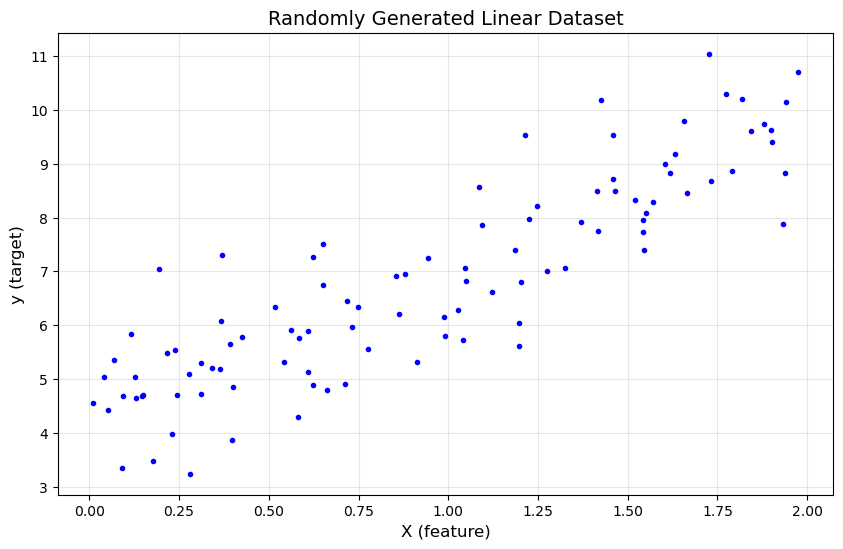

Data shape: X = (100, 1), y = (100, 1)
X range: [0.01, 1.97]
y range: [3.24, 11.04]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate linear-looking data with noise
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # single feature, values between 0 and 2
y = 4 + 3 * X + np.random.randn(m, 1)  # y = 4 + 3x + Gaussian noise

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.")
plt.xlabel("X (feature)", fontsize=12)
plt.ylabel("y (target)", fontsize=12)
plt.title("Randomly Generated Linear Dataset", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data shape: X = {X.shape}, y = {y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")


## Step 3: Mathematical Solution - Normal Equation

The Normal Equation provides a closed-form solution to find the optimal parameters.


In [2]:
# Method 1: Manual implementation using Normal Equation
# Add bias term (x0 = 1) to each instance
X_b = add_dummy_feature(X)  # Now X_b has shape (100, 2)

# Compute theta using Normal Equation: θ̂ = (XᵀX)⁻¹ Xᵀy
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Parameters from Normal Equation:")
print(f"θ₀ (bias/intercept): {theta_best[0][0]:.4f}")
print(f"θ₁ (feature weight): {theta_best[1][0]:.4f}")
print(f"\nExpected values: θ₀ = 4.0, θ₁ = 3.0")
print(f"Note: The noise in the data prevents exact recovery of the true parameters.")


Parameters from Normal Equation:
θ₀ (bias/intercept): 4.2151
θ₁ (feature weight): 2.7701

Expected values: θ₀ = 4.0, θ₁ = 3.0
Note: The noise in the data prevents exact recovery of the true parameters.


## Step 4: Alternative Computational Methods

Besides the Normal Equation, there are other methods to compute the optimal parameters.


In [3]:
# Method 2: Using np.linalg.lstsq() (least squares)
# This uses SVD (Singular Value Decomposition) internally
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Parameters from np.linalg.lstsq() (SVD method):")
print(f"θ₀: {theta_best_svd[0][0]:.4f}")
print(f"θ₁: {theta_best_svd[1][0]:.4f}")

# Method 3: Using pseudoinverse (Moore-Penrose inverse)
theta_best_pinv = np.linalg.pinv(X_b) @ y
print("\nParameters from pseudoinverse:")
print(f"θ₀: {theta_best_pinv[0][0]:.4f}")
print(f"θ₁: {theta_best_pinv[1][0]:.4f}")

print("\nAll methods should give the same result (or very close):")
print(f"Difference between Normal Eq and SVD: {np.abs(theta_best - theta_best_svd).max():.10f}")
print(f"Difference between Normal Eq and Pinv: {np.abs(theta_best - theta_best_pinv).max():.10f}")


Parameters from np.linalg.lstsq() (SVD method):
θ₀: 4.2151
θ₁: 2.7701

Parameters from pseudoinverse:
θ₀: 4.2151
θ₁: 2.7701

All methods should give the same result (or very close):
Difference between Normal Eq and SVD: 0.0000000000
Difference between Normal Eq and Pinv: 0.0000000000


## Step 5: Make Predictions

Now let's use the computed parameters to make predictions on new data.


Predictions for X = [0 2]:
ŷ = [4.21509616 9.75532293]


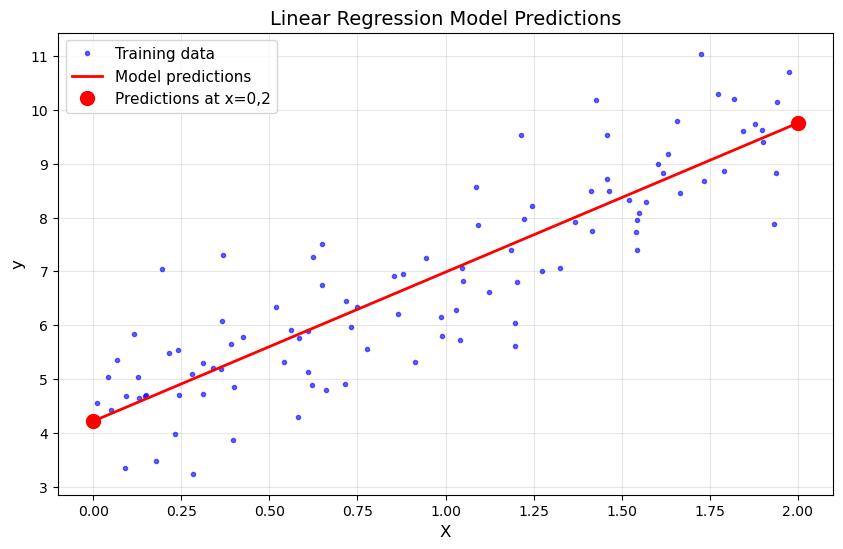

In [4]:
# Create new data points for prediction
X_new = np.array([[0], [2]])  # Predict for x=0 and x=2

# Add bias term to new data
X_new_b = add_dummy_feature(X_new)

# Make predictions using Normal Equation solution
y_predict = X_new_b @ theta_best
print(f"Predictions for X = {X_new.ravel()}:")
print(f"ŷ = {y_predict.ravel()}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", alpha=0.6, label="Training data")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Model predictions")
plt.plot(X_new, y_predict, "ro", markersize=10, label="Predictions at x=0,2")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Linear Regression Model Predictions", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


## Step 6: Using Scikit-Learn Implementation

Scikit-Learn provides a convenient and optimized implementation of linear regression.


Scikit-Learn LinearRegression:
Intercept (θ₀): 4.2151
Coefficient (θ₁): 2.7701

Comparison with Normal Equation:
Intercept difference: 0.0000000000
Coefficient difference: 0.0000000000

Scikit-Learn predictions for X = [0 2]:
ŷ = [4.21509616 9.75532293]


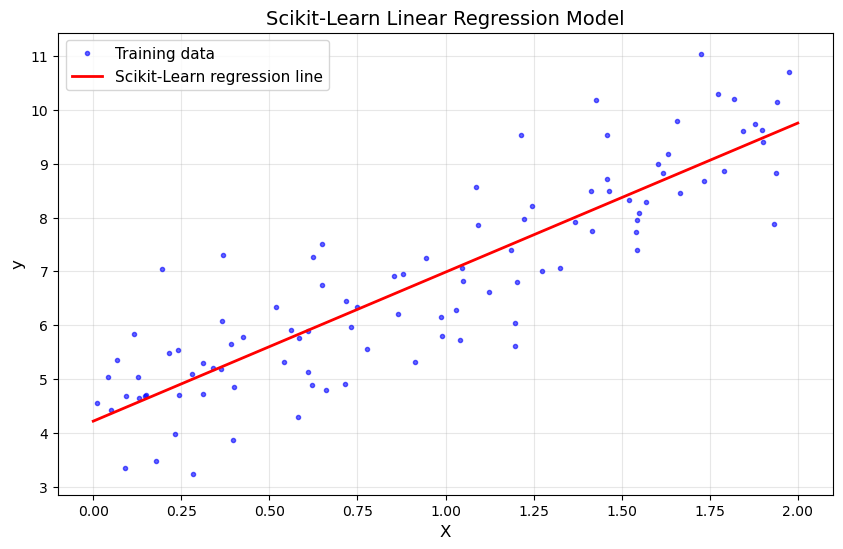

In [5]:
# Create and train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Scikit-Learn LinearRegression:")
print(f"Intercept (θ₀): {lin_reg.intercept_[0]:.4f}")
print(f"Coefficient (θ₁): {lin_reg.coef_[0][0]:.4f}")

# Compare with Normal Equation
print(f"\nComparison with Normal Equation:")
print(f"Intercept difference: {abs(lin_reg.intercept_[0] - theta_best[0][0]):.10f}")
print(f"Coefficient difference: {abs(lin_reg.coef_[0][0] - theta_best[1][0]):.10f}")

# Make predictions
y_pred_sklearn = lin_reg.predict(X_new)
print(f"\nScikit-Learn predictions for X = {X_new.ravel()}:")
print(f"ŷ = {y_pred_sklearn.ravel()}")

# Visualize Scikit-Learn predictions
plt.figure(figsize=(10, 6))
# Plot the regression line for all X values
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = lin_reg.predict(X_line)
plt.plot(X, y, "b.", alpha=0.6, label="Training data")
plt.plot(X_line, y_line, "r-", linewidth=2, label="Scikit-Learn regression line")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Scikit-Learn Linear Regression Model", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()


## Step 7: Evaluate Model Performance

Let's calculate performance metrics to assess how well our model fits the data.


Model Performance Metrics:
Mean Squared Error (MSE): 0.8066
Root Mean Squared Error (RMSE): 0.8981
R² Score: 0.7693 (coefficient of determination)

R² Score Interpretation:
- R² = 1.0: Perfect predictions
- R² = 0.0: Model predicts the mean
- R² < 0.0: Model is worse than predicting the mean


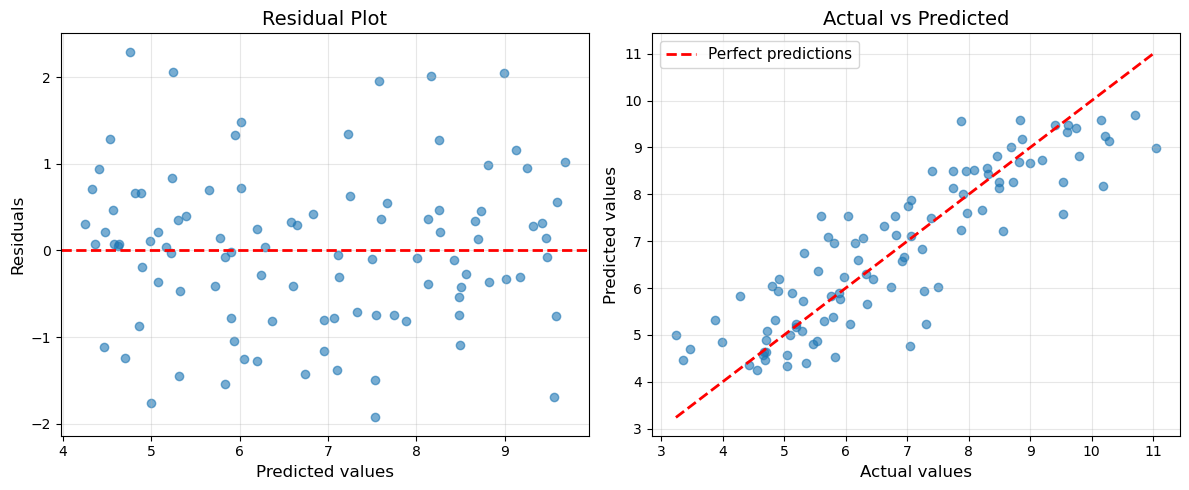

In [6]:
# Predict on training data
y_train_pred = lin_reg.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_train_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f} (coefficient of determination)")
print(f"\nR² Score Interpretation:")
print(f"- R² = 1.0: Perfect predictions")
print(f"- R² = 0.0: Model predicts the mean")
print(f"- R² < 0.0: Model is worse than predicting the mean")

# Visualize residuals
residuals = y.ravel() - y_train_pred.ravel()
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y, y_train_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect predictions')
plt.xlabel("Actual values", fontsize=12)
plt.ylabel("Predicted values", fontsize=12)
plt.title("Actual vs Predicted", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 8: Understanding Computational Complexity

Let's demonstrate the computational complexity of different methods.


In [7]:
import time

def time_complexity_demo():
    """Demonstrate computational complexity of different methods"""
    
    n_features_list = [10, 100, 500]
    m_instances = 10000
    
    print("Computational Complexity Demonstration:")
    print("=" * 60)
    print(f"Number of instances (m): {m_instances}")
    print("-" * 60)
    
    for n_features in n_features_list:
        # Generate random data
        X_large = np.random.randn(m_instances, n_features)
        y_large = np.random.randn(m_instances, 1)
        
        # Add bias term
        X_b_large = add_dummy_feature(X_large)
        
        # Time Normal Equation (O(n³))
        try:
            start = time.time()
            theta_ne = np.linalg.inv(X_b_large.T @ X_b_large) @ X_b_large.T @ y_large
            time_ne = time.time() - start
            ne_success = True
        except:
            time_ne = None
            ne_success = False
        
        # Time Scikit-Learn (O(n²) using SVD)
        start = time.time()
        lin_reg_large = LinearRegression()
        lin_reg_large.fit(X_large, y_large)
        time_sklearn = time.time() - start
        
        print(f"n={n_features:3d}: ", end="")
        if ne_success:
            print(f"Normal Equation={time_ne:.4f}s, ", end="")
        else:
            print(f"Normal Equation=FAILED, ", end="")
        print(f"Scikit-Learn={time_sklearn:.4f}s")
    
    print("\nNote:")
    print("- Normal Equation: O(n²) to O(n³) complexity")
    print("- Scikit-Learn (SVD): O(n²) complexity, more stable")
    print("- Both are O(m) with respect to number of instances")

# Run demonstration
time_complexity_demo()


Computational Complexity Demonstration:
Number of instances (m): 10000
------------------------------------------------------------
n= 10: Normal Equation=0.0080s, Scikit-Learn=0.0268s
n=100: Normal Equation=0.0383s, Scikit-Learn=0.6796s
n=500: Normal Equation=0.1813s, Scikit-Learn=0.9208s

Note:
- Normal Equation: O(n²) to O(n³) complexity
- Scikit-Learn (SVD): O(n²) complexity, more stable
- Both are O(m) with respect to number of instances


## Step 9: Handling Edge Cases

Let's explore how different methods handle edge cases like singular matrices and multicollinearity.


In [8]:
def handle_edge_cases():
    """Demonstrate handling of edge cases in linear regression"""
    
    print("Edge Cases Handling:")
    print("=" * 60)
    
    # Case 1: More features than samples (m < n)
    print("\n1. More features than samples (m=10, n=20):")
    X_edge = np.random.randn(10, 20)
    y_edge = np.random.randn(10, 1)
    
    try:
        # This will fail with Normal Equation
        X_b_edge = add_dummy_feature(X_edge)
        theta_edge = np.linalg.inv(X_b_edge.T @ X_b_edge) @ X_b_edge.T @ y_edge
        print("   Normal Equation succeeded (unexpected!)")
    except np.linalg.LinAlgError:
        print("   Normal Equation failed: XᵀX is singular (not invertible)")
    
    # Scikit-Learn handles this using SVD (pseudoinverse)
    try:
        lin_reg_edge = LinearRegression()
        lin_reg_edge.fit(X_edge, y_edge)
        print(f"   Scikit-Learn succeeded with {lin_reg_edge.coef_.shape[1]} features")
    except Exception as e:
        print(f"   Scikit-Learn failed: {e}")
    
    # Case 2: Perfectly correlated features (multicollinearity)
    print("\n2. Perfectly correlated features:")
    X_corr = np.random.randn(100, 2)
    X_corr[:, 1] = 2 * X_corr[:, 0]  # Perfect correlation
    y_corr = np.random.randn(100, 1)
    
    try:
        X_b_corr = add_dummy_feature(X_corr)
        theta_corr = np.linalg.inv(X_b_corr.T @ X_b_corr) @ X_b_corr.T @ y_corr
        print("   Normal Equation succeeded (unexpected!)")
    except np.linalg.LinAlgError:
        print("   Normal Equation failed: Singular matrix due to multicollinearity")
    
    # Scikit-Learn handles this using regularization or SVD
    try:
        lin_reg_corr = LinearRegression()
        lin_reg_corr.fit(X_corr, y_corr)
        print("   Scikit-Learn succeeded (uses pseudoinverse)")
        print(f"   Coefficients: {lin_reg_corr.coef_[0]}")
    except Exception as e:
        print(f"   Scikit-Learn failed: {e}")
        # Try Ridge regression as alternative
        from sklearn.linear_model import Ridge
        ridge_reg = Ridge(alpha=0.1)
        ridge_reg.fit(X_corr, y_corr)
        print("   Ridge regression (with regularization) succeeded")
    
    # Case 3: Single feature (should work for both)
    print("\n3. Single feature (normal case):")
    X_single = np.random.randn(100, 1)
    y_single = np.random.randn(100, 1)
    
    try:
        X_b_single = add_dummy_feature(X_single)
        theta_single = np.linalg.inv(X_b_single.T @ X_b_single) @ X_b_single.T @ y_single
        print("   Normal Equation succeeded")
    except:
        print("   Normal Equation failed")
    
    lin_reg_single = LinearRegression()
    lin_reg_single.fit(X_single, y_single)
    print("   Scikit-Learn succeeded")

handle_edge_cases()


Edge Cases Handling:

1. More features than samples (m=10, n=20):
   Normal Equation succeeded (unexpected!)
   Scikit-Learn succeeded with 20 features

2. Perfectly correlated features:
   Normal Equation succeeded (unexpected!)
   Scikit-Learn succeeded (uses pseudoinverse)
   Coefficients: [-0.01017432 -0.02034864]

3. Single feature (normal case):
   Normal Equation succeeded
   Scikit-Learn succeeded


In [9]:
# Load the houses dataset
df = pd.read_csv('Linear-Regression/houses_data_eng.csv')

print("Dataset Overview:")
print("=" * 60)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst few rows:")
df.head()


Dataset Overview:
Dataset shape: (4675, 15)

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'new_price', 'desc', 'address', 'chambres', 'salles de bains', 'surface', 'ascenseur', 'floor', 'terrasse', 'parking', 'Type', 'City', 'Nighberd']

Data types:
Unnamed: 0.1        int64
Unnamed: 0          int64
new_price           int64
desc               object
address            object
chambres            int64
salles de bains     int64
surface             int64
ascenseur          object
floor               int64
terrasse           object
parking            object
Type               object
City               object
Nighberd           object
dtype: object

First few rows:


,Unnamed: 0.1,Unnamed: 0,new_price,desc,address,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,0,0,1000000,98 m² crossing apartment in the heart of the B...,Appartement à vendre Casablanca - Belvédère,2,1,98,Yes,5,Yes,No,Appartement,Casablanca,Belvédère
1,1,1,1750000,Office for sale of 173 m² in Casablanca - Your...,Bureau à vendre Casablanca - Autre,1,2,173,Yes,7,Yes,No,Bureau,Casablanca,Autre
2,2,2,2600000,"Discover your future home in Mandarona, Casabl...",Appartement à vendre Casablanca - Californie,3,2,150,Yes,3,Yes,Yes,Appartement,Casablanca,Californie
3,3,3,2290000,For Sale - Bright apartment of 130 m² fully re...,Appartement à vendre Casablanca - Les Hôpitaux,2,1,130,Yes,3,No,No,Appartement,Casablanca,Les Hôpitaux
4,4,4,1460000,Welcome to this charming apartment located in ...,Appartement à vendre Meknès - Hamria,3,2,163,Yes,2,No,No,Appartement,Meknès,Hamria


In [10]:
# Explore the dataset
print("Dataset Statistics:")
print("=" * 60)
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nNumeric columns summary:")
print(df[['new_price', 'chambres', 'salles de bains', 'surface', 'floor']].describe())
print(f"\nCategorical columns value counts:")
print(f"\nascenseur (elevator):\n{df['ascenseur'].value_counts()}")
print(f"\nterrasse (terrace):\n{df['terrasse'].value_counts()}")
print(f"\nparking:\n{df['parking'].value_counts()}")
print(f"\nType:\n{df['Type'].value_counts()}")


Dataset Statistics:

Missing values:
Unnamed: 0.1       0
Unnamed: 0         0
new_price          0
desc               0
address            0
chambres           0
salles de bains    0
surface            0
ascenseur          0
floor              0
terrasse           0
parking            0
Type               0
City               0
Nighberd           0
dtype: int64

Numeric columns summary:
          new_price    chambres  salles de bains      surface        floor
count  4.675000e+03  4675.00000      4675.000000  4675.000000  4675.000000
mean   1.871291e+06     2.32000         1.680000   143.720000     3.200000
std    1.348472e+06     1.91269         0.835314   158.579131     1.385789
min    6.770260e+05     1.00000         1.000000    32.000000     1.000000
25%    1.000000e+06     1.00000         1.000000    50.000000     3.000000
50%    1.460000e+06     2.00000         1.000000    83.000000     3.000000
75%    1.794000e+06     3.00000         2.000000   150.000000     4.000000
max    6.

In [11]:
# Prepare the data for modeling
# Select numeric features
numeric_features = ['chambres', 'salles de bains', 'surface', 'floor']
X_numeric = df[numeric_features].copy()

# Encode binary features (Yes/No to 1/0)
X_numeric['ascenseur'] = (df['ascenseur'] == 'Yes').astype(int)
X_numeric['terrasse'] = (df['terrasse'] == 'Yes').astype(int)
X_numeric['parking'] = (df['parking'] == 'Yes').astype(int)

# Target variable
y = df['new_price'].values.reshape(-1, 1)

print("Prepared Data:")
print("=" * 60)
print(f"Feature matrix shape: {X_numeric.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeature columns: {X_numeric.columns.tolist()}")
print(f"\nFeatures statistics:")
print(X_numeric.describe())
print(f"\nTarget (price) statistics:")
print(f"Min: {y.min():,}, Max: {y.max():,}, Mean: {y.mean():,.2f}, Std: {y.std():,.2f}")


Prepared Data:
Feature matrix shape: (4675, 7)
Target vector shape: (4675, 1)

Feature columns: ['chambres', 'salles de bains', 'surface', 'floor', 'ascenseur', 'terrasse', 'parking']

Features statistics:
         chambres  salles de bains      surface        floor    ascenseur  \
count  4675.00000      4675.000000  4675.000000  4675.000000  4675.000000   
mean      2.32000         1.680000   143.720000     3.200000     0.880000   
std       1.91269         0.835314   158.579131     1.385789     0.324996   
min       1.00000         1.000000    32.000000     1.000000     0.000000   
25%       1.00000         1.000000    50.000000     3.000000     1.000000   
50%       2.00000         1.000000    83.000000     3.000000     1.000000   
75%       3.00000         2.000000   150.000000     4.000000     1.000000   
max      10.00000         4.000000   720.000000     7.000000     1.000000   

         terrasse      parking  
count  4675.00000  4675.000000  
mean      0.44000     0.360000  
s

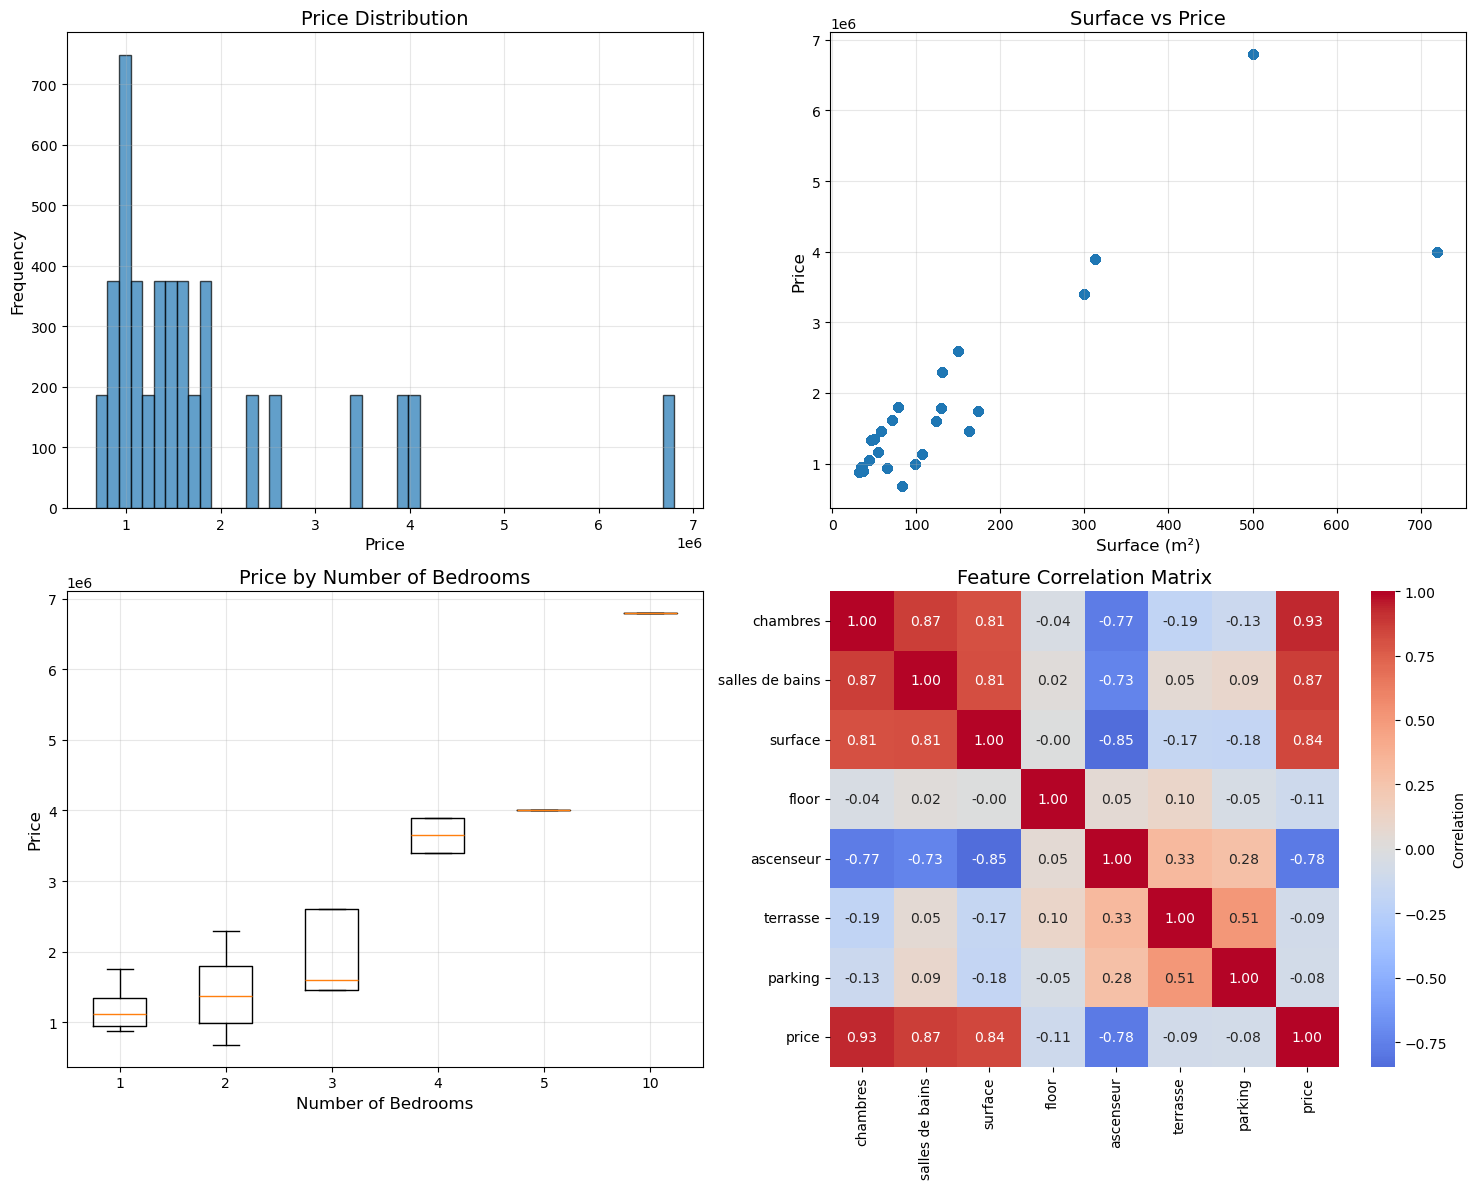

In [12]:
# Visualize the relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price distribution
axes[0, 0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Price', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)

# Surface vs Price
axes[0, 1].scatter(X_numeric['surface'], y, alpha=0.5)
axes[0, 1].set_xlabel('Surface (m²)', fontsize=12)
axes[0, 1].set_ylabel('Price', fontsize=12)
axes[0, 1].set_title('Surface vs Price', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# Bedrooms vs Price
axes[1, 0].boxplot([y[X_numeric['chambres']==i].ravel() for i in sorted(X_numeric['chambres'].unique())], 
                   labels=sorted(X_numeric['chambres'].unique()))
axes[1, 0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[1, 0].set_ylabel('Price', fontsize=12)
axes[1, 0].set_title('Price by Number of Bedrooms', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Correlation heatmap
corr_data = X_numeric.copy()
corr_data['price'] = y.ravel()
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[1, 1], cbar_kws={'label': 'Correlation'})
axes[1, 1].set_title('Feature Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()


In [13]:
# Convert to numpy arrays
X = X_numeric.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data Splitting:")
print("=" * 60)
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Testing set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")
print(f"Training samples: {len(X_train)} ({100*len(X_train)/len(X):.1f}%)")
print(f"Testing samples: {len(X_test)} ({100*len(X_test)/len(X):.1f}%)")


Data Splitting:
Training set: X_train shape = (3740, 7), y_train shape = (3740, 1)
Testing set: X_test shape = (935, 7), y_test shape = (935, 1)
Training samples: 3740 (80.0%)
Testing samples: 935 (20.0%)


### 10.1: Linear Regression using Normal Equation


In [14]:
# Scale features for better numerical stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term
X_train_b = add_dummy_feature(X_train_scaled)
X_test_b = add_dummy_feature(X_test_scaled)

# Compute theta using Normal Equation
print("Training Linear Regression using Normal Equation:")
print("=" * 60)
theta_normal = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"\nModel Parameters (θ):")
print(f"Bias term (θ₀): {theta_normal[0][0]:,.2f}")
for i, feature_name in enumerate(X_numeric.columns):
    print(f"{feature_name} coefficient (θ{i+1}): {theta_normal[i+1][0]:,.2f}")

# Make predictions
y_train_pred_normal = X_train_b @ theta_normal
y_test_pred_normal = X_test_b @ theta_normal

# Calculate metrics
train_mse_normal = mean_squared_error(y_train, y_train_pred_normal)
test_mse_normal = mean_squared_error(y_test, y_test_pred_normal)
train_rmse_normal = np.sqrt(train_mse_normal)
test_rmse_normal = np.sqrt(test_mse_normal)
train_r2_normal = r2_score(y_train, y_train_pred_normal)
test_r2_normal = r2_score(y_test, y_test_pred_normal)

print(f"\nNormal Equation Performance:")
print(f"Training MSE: {train_mse_normal:,.2f}")
print(f"Training RMSE: {train_rmse_normal:,.2f}")
print(f"Training R²: {train_r2_normal:.4f}")
print(f"\nTesting MSE: {test_mse_normal:,.2f}")
print(f"Testing RMSE: {test_rmse_normal:,.2f}")
print(f"Testing R²: {test_r2_normal:.4f}")


Training Linear Regression using Normal Equation:

Model Parameters (θ):
Bias term (θ₀): 1,863,587.73
chambres coefficient (θ1): 875,725.55
salles de bains coefficient (θ2): 121,425.71
surface coefficient (θ3): 257,402.50
floor coefficient (θ4): -129,877.08
ascenseur coefficient (θ5): -104,702.55
terrasse coefficient (θ6): 138,774.27
parking coefficient (θ7): -14,911.76

Normal Equation Performance:
Training MSE: 168,061,474,785.30
Training RMSE: 409,953.02
Training R²: 0.9071

Testing MSE: 167,294,698,304.92
Testing RMSE: 409,016.75
Testing R²: 0.9098


### 10.2: Linear Regression using Scikit-Learn


In [15]:
# Train using Scikit-Learn
lin_reg_house = LinearRegression()
lin_reg_house.fit(X_train_scaled, y_train)

print("Scikit-Learn Linear Regression:")
print("=" * 60)
print(f"Intercept (θ₀): {lin_reg_house.intercept_[0]:,.2f}")
print(f"\nFeature Coefficients:")
for i, feature_name in enumerate(X_numeric.columns):
    print(f"{feature_name}: {lin_reg_house.coef_[0][i]:,.2f}")

# Make predictions
y_train_pred_sklearn = lin_reg_house.predict(X_train_scaled)
y_test_pred_sklearn = lin_reg_house.predict(X_test_scaled)

# Calculate metrics
train_mse_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
test_mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
train_rmse_sklearn = np.sqrt(train_mse_sklearn)
test_rmse_sklearn = np.sqrt(test_mse_sklearn)
train_r2_sklearn = r2_score(y_train, y_train_pred_sklearn)
test_r2_sklearn = r2_score(y_test, y_test_pred_sklearn)

print(f"\nScikit-Learn Performance:")
print(f"Training MSE: {train_mse_sklearn:,.2f}")
print(f"Training RMSE: {train_rmse_sklearn:,.2f}")
print(f"Training R²: {train_r2_sklearn:.4f}")
print(f"\nTesting MSE: {test_mse_sklearn:,.2f}")
print(f"Testing RMSE: {test_rmse_sklearn:,.2f}")
print(f"Testing R²: {test_r2_sklearn:.4f}")

# Compare with Normal Equation
print(f"\nComparison (Normal Eq vs Scikit-Learn):")
print(f"Intercept difference: {abs(theta_normal[0][0] - lin_reg_house.intercept_[0]):.10f}")
coef_diff = np.abs(theta_normal[1:] - lin_reg_house.coef_.T).max()
print(f"Max coefficient difference: {coef_diff:.10f}")


Scikit-Learn Linear Regression:
Intercept (θ₀): 1,863,587.73

Feature Coefficients:
chambres: 875,725.55
salles de bains: 121,425.71
surface: 257,402.50
floor: -129,877.08
ascenseur: -104,702.55
terrasse: 138,774.27
parking: -14,911.76

Scikit-Learn Performance:
Training MSE: 168,061,474,785.30
Training RMSE: 409,953.02
Training R²: 0.9071

Testing MSE: 167,294,698,304.92
Testing RMSE: 409,016.75
Testing R²: 0.9098

Comparison (Normal Eq vs Scikit-Learn):
Intercept difference: 0.0000000014
Max coefficient difference: 0.0000000044


### 10.3: Visualization of Results


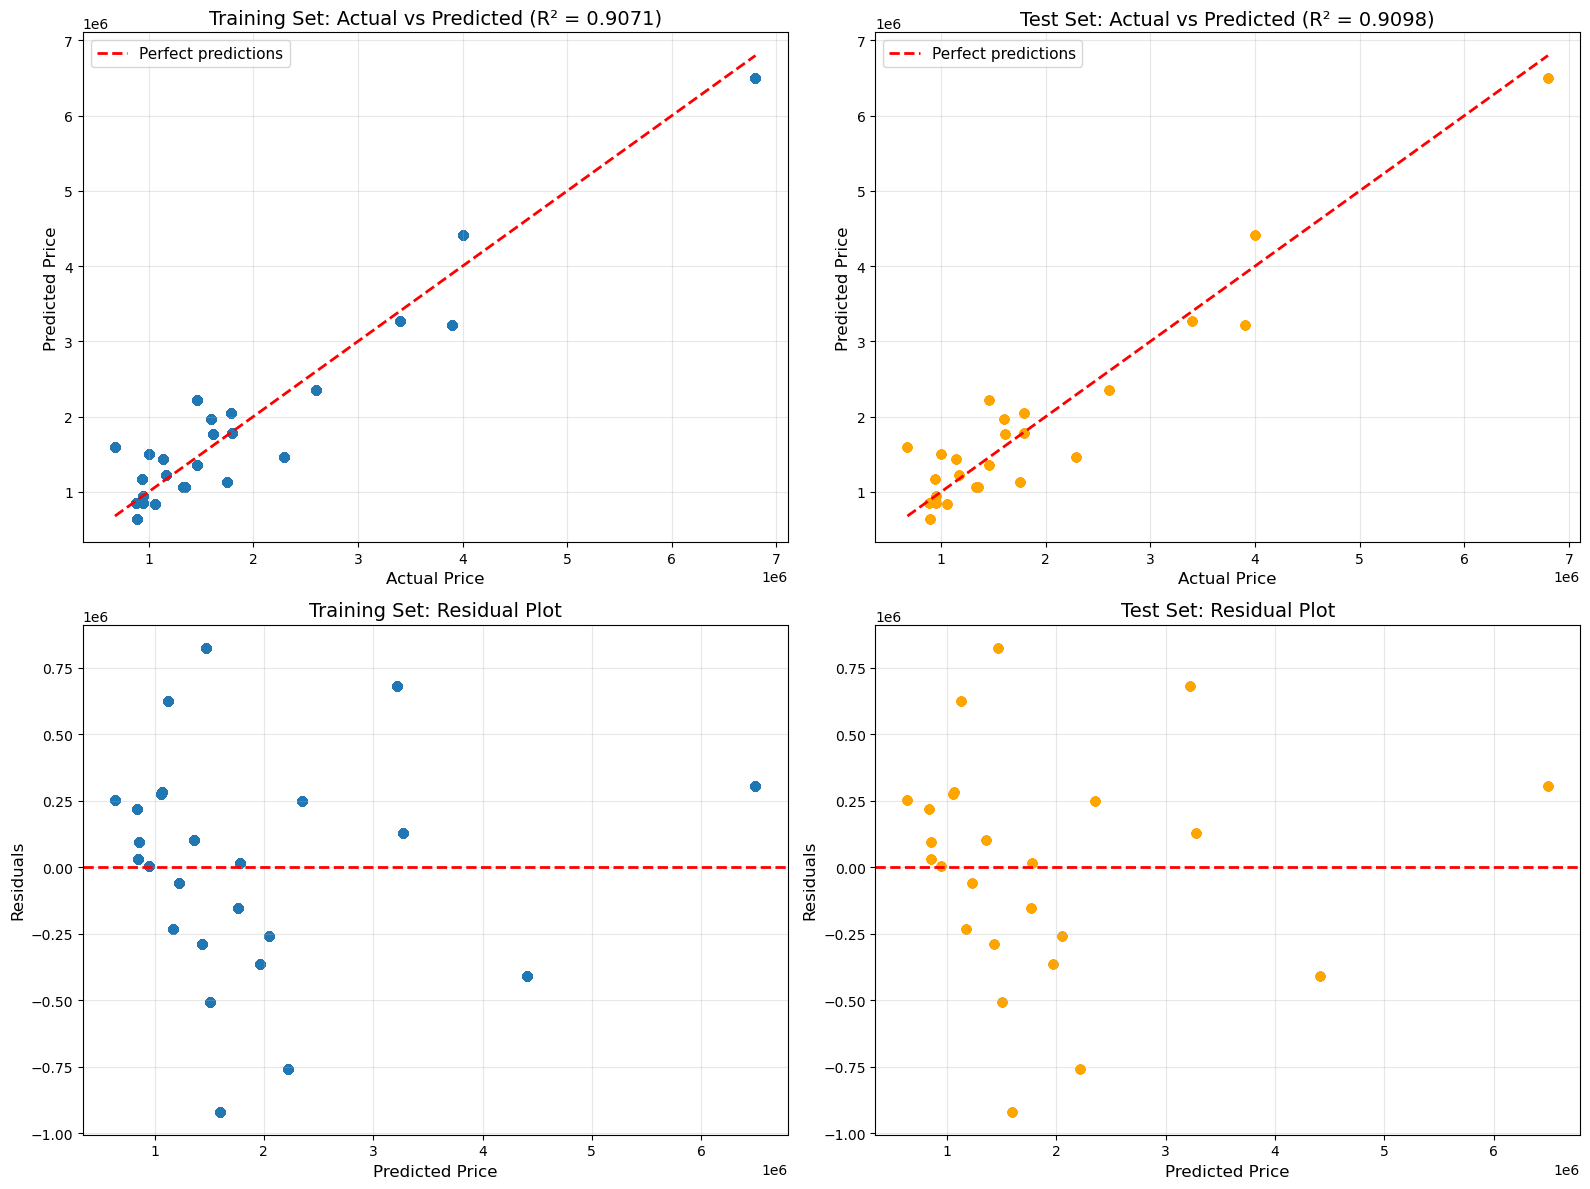

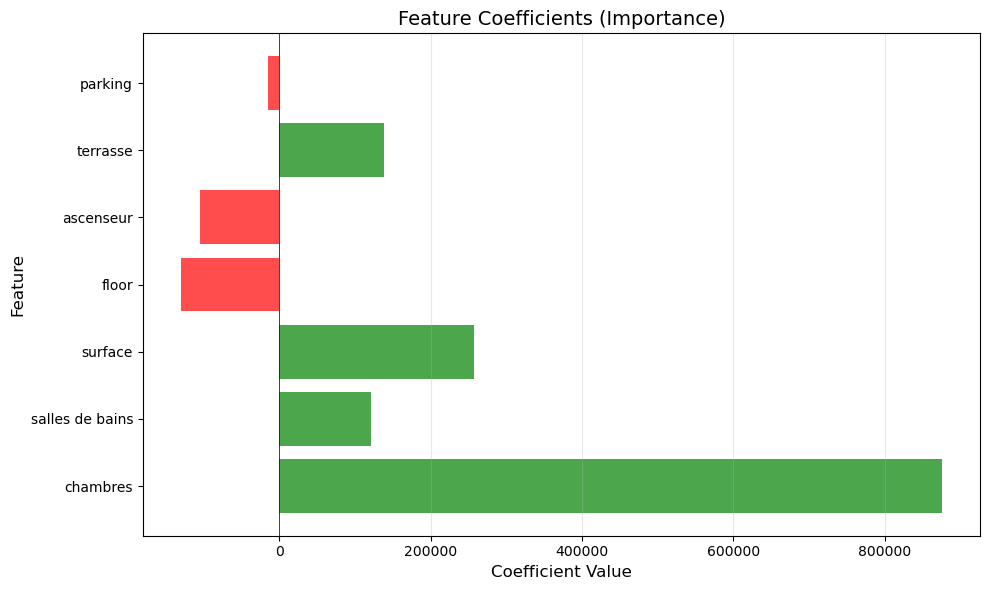

In [16]:
# Visualize predictions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Training set: Actual vs Predicted
axes[0, 0].scatter(y_train, y_train_pred_sklearn, alpha=0.5)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', linewidth=2, label='Perfect predictions')
axes[0, 0].set_xlabel('Actual Price', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price', fontsize=12)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted (R² = {train_r2_sklearn:.4f})', fontsize=14)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Test set: Actual vs Predicted
axes[0, 1].scatter(y_test, y_test_pred_sklearn, alpha=0.5, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect predictions')
axes[0, 1].set_xlabel('Actual Price', fontsize=12)
axes[0, 1].set_ylabel('Predicted Price', fontsize=12)
axes[0, 1].set_title(f'Test Set: Actual vs Predicted (R² = {test_r2_sklearn:.4f})', fontsize=14)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot (training)
residuals_train = y_train.ravel() - y_train_pred_sklearn.ravel()
axes[1, 0].scatter(y_train_pred_sklearn, residuals_train, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Price', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Training Set: Residual Plot', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# Residuals plot (test)
residuals_test = y_test.ravel() - y_test_pred_sklearn.ravel()
axes[1, 1].scatter(y_test_pred_sklearn, residuals_test, alpha=0.5, color='orange')
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price', fontsize=12)
axes[1, 1].set_ylabel('Residuals', fontsize=12)
axes[1, 1].set_title('Test Set: Residual Plot', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (coefficients)
plt.figure(figsize=(10, 6))
feature_names = X_numeric.columns
coefficients = lin_reg_house.coef_[0]
colors = ['green' if x > 0 else 'red' for x in coefficients]
plt.barh(feature_names, coefficients, color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Coefficients (Importance)', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### 10.4: Complete Pipeline Function

Here's a reusable function that encapsulates the complete linear regression pipeline.


In [17]:
def linear_regression_pipeline(X, y, test_size=0.2, random_state=42, scale_features=True):
    """
    Complete linear regression pipeline with train/test split
    and performance evaluation.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix
    y : array-like, shape (n_samples, 1)
        Target vector
    test_size : float, default=0.2
        Proportion of dataset to include in the test split
    random_state : int, default=42
        Random seed for reproducibility
    scale_features : bool, default=True
        Whether to scale features using StandardScaler
    
    Returns:
    --------
    model : LinearRegression
        Trained linear regression model
    scaler : StandardScaler or None
        Fitted scaler (if scale_features=True)
    results : dict
        Dictionary containing performance metrics
    """
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    
    # 1. Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # 2. Scale features (optional but recommended)
    scaler = None
    if scale_features:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    # 3. Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # 4. Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # 5. Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    return model, scaler, results

# Example usage
print("Complete Pipeline Example:")
print("=" * 60)
model_final, scaler_final, results_final = linear_regression_pipeline(
    X, y, test_size=0.2, random_state=42, scale_features=True
)

print(f"Training MSE: {results_final['train_mse']:,.2f}")
print(f"Test MSE: {results_final['test_mse']:,.2f}")
print(f"Training RMSE: {results_final['train_rmse']:,.2f}")
print(f"Test RMSE: {results_final['test_rmse']:,.2f}")
print(f"Training R²: {results_final['train_r2']:.4f}")
print(f"Test R²: {results_final['test_r2']:.4f}")
print(f"\nIntercept: {model_final.intercept_[0]:,.2f}")
print(f"\nFeature Coefficients:")
for i, feature_name in enumerate(X_numeric.columns):
    print(f"  {feature_name}: {model_final.coef_[0][i]:,.2f}")


Complete Pipeline Example:
Training MSE: 168,061,474,785.30
Test MSE: 167,294,698,304.92
Training RMSE: 409,953.02
Test RMSE: 409,016.75
Training R²: 0.9071
Test R²: 0.9098

Intercept: 1,863,587.73

Feature Coefficients:
  chambres: 875,725.55
  salles de bains: 121,425.71
  surface: 257,402.50
  floor: -129,877.08
  ascenseur: -104,702.55
  terrasse: 138,774.27
  parking: -14,911.76


## Summary and Key Takeaways

### **Key Concepts:**

1. **Normal Equation**: Direct mathematical solution, O(n²) to O(n³) complexity
   - θ̂ = (XᵀX)⁻¹ Xᵀy
   - Works well for small to medium datasets
   - Can fail with singular matrices or multicollinearity

2. **SVD/Pseudoinverse**: More numerically stable, handles edge cases
   - Uses Singular Value Decomposition
   - Always defined (unlike Normal Equation)
   - Used internally by Scikit-Learn

3. **Scikit-Learn**: Preferred for production use
   - Handles scaling and edge cases automatically
   - Optimized implementation
   - Easy to use API

### **Performance Metrics:**

- **MSE (Mean Squared Error)**: Average of squared errors
- **RMSE (Root Mean Squared Error)**: Square root of MSE, in same units as target
- **R² Score**: Coefficient of determination
  - R² = 1.0: Perfect predictions
  - R² = 0.0: Model predicts the mean
  - R² < 0.0: Model is worse than predicting the mean

### **Computational Complexity:**

- **Training**: O(n²) to O(n³) depending on method, O(m) with respect to instances
- **Prediction**: O(n) per instance

### **When to Use Each Method:**

- **Normal Equation**: Small datasets (n < 1000), educational purposes
- **Scikit-Learn**: Production use, large datasets, automatic handling of edge cases
- **Manual SVD**: When you need more control over numerical stability

### **Best Practices:**

1. Always split data into training and testing sets
2. Scale features for better numerical stability
3. Evaluate on test set to check for overfitting
4. Visualize residuals to check model assumptions
5. Check for multicollinearity in features
6. Use R² and RMSE together for comprehensive evaluation
